Install LaTex

- ```sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super```
- https://github.com/garrettj403/SciencePlots/wiki/FAQ#installing-latex

function copy from 
- https://jwalton.info/Embed-Publication-Matplotlib-Latex/

In [28]:
# https://jwalton.info/Embed-Publication-Matplotlib-Latex/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predefined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = (fig_width_pt * inches_per_pt) * subplots[1]
    # Figure height in inches
    # print(fig_width_in,subplots)
    fig_height_in = (fig_width_in * golden_ratio * (subplots[0] / subplots[1]))
    # print(fig_height_in,subplots, subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [29]:
import matplotlib.pyplot as plt
width = 345
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

"""A simple example of creating a figure with text rendered in LaTeX."""

import numpy as np
x = np.linspace(0, 2*np.pi, 100)

Demo

Text(0, 0.5, '$\\sin (\\theta)$')

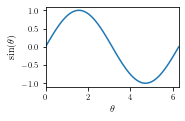

In [30]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=0.5))
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')

Text(0, 0.5, '$\\sin (\\theta)$')

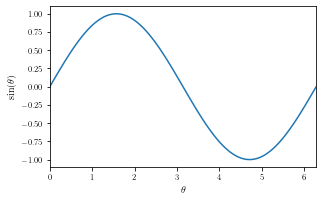

In [31]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=1))
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')

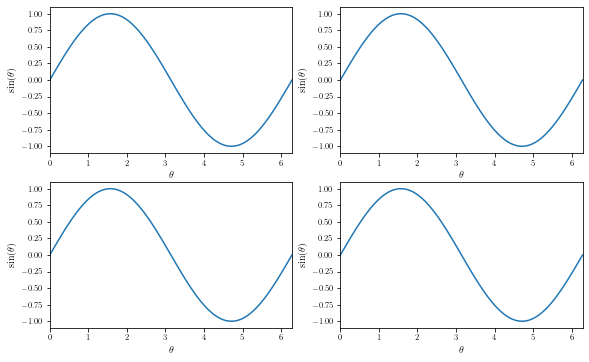

In [32]:
# Initialise figure instance
row, col = 2,2
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=set_size(width, subplots=(row,col)))
# Plot
for i in range(row):
    for j in range(col):
        ax[i][j].plot(x, np.sin(x))
        ax[i][j].set_xlim(0, 2 * np.pi)
        ax[i][j].set_xlabel(r'$\theta$')
        ax[i][j].set_ylabel(r'$\sin (\theta)$')

## 10-CV graph

In [33]:
targets = ['ensemble','ada','boost','lda','lr','rf','baseline']
ranks = dict()
for target in targets:
    if(target not in ranks):
        ranks[target] = dict()
    f = open(f"rank_{target}.txt",'r')
    for line in f.readlines():
        model, acc, cv_mean, cv_std = line.rstrip('\n').split(' ')
        model = model.rstrip(':')
        # print(model)
        if(model not in ranks[target]):
            ranks[target][model] = dict({
                'acc': [],
                'cv_mean':[],
                'cv_std': []
            })
        ranks[target][model]['acc'].append(float(acc))
        ranks[target][model]['cv_mean'].append(float(cv_mean))
        ranks[target][model]['cv_std'].append(float(cv_std))
    f.close()


In [34]:
models = list(ranks['ensemble'].keys())
print(models)

['SVM', 'LR', 'Boost', 'Ada', 'RF', 'LDA']


SVM


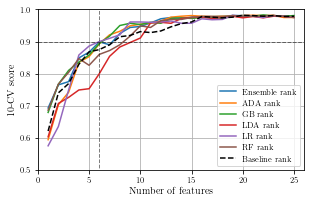

LR


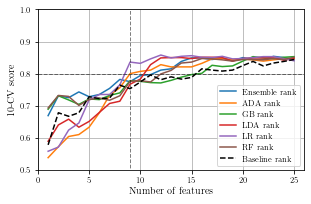

Boost


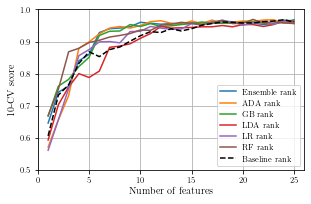

Ada


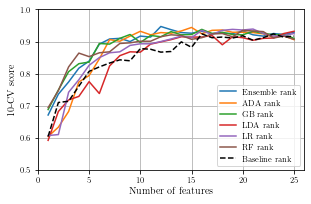

RF


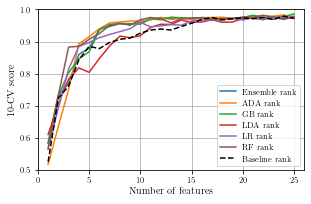

LDA


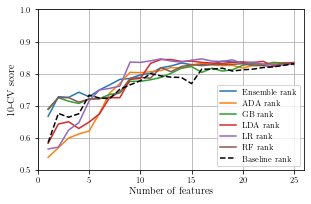

In [35]:

for model in models:
    row, col = 1,1
    fig, ax = plt.subplots(nrows=row, ncols=col, figsize=set_size(width,fraction=1, subplots=(row,col)))
    print(model)
    for target in targets:
        values = ranks[target][model]['cv_mean']
        label = None
        if(target == 'ensemble'): label = target.capitalize()
        elif(target == 'boost'): label = 'GB'
        elif(target == 'baseline'): 
            label = target.capitalize()
            ax.plot(range(1,25+1), values, label=f'{label} rank', linestyle='dashed', c='black')
            continue
        else: label = target.upper()
        ax.plot(range(1,25+1), values, label=f'{label} rank')
    if(model=='SVM'):
        ax.plot([0,26], [0.9,0.9], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
        ax.plot([6,6], [0,1], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
    elif(model=='LR'):
        ax.plot([0,26], [0.8,0.8], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
        ax.plot([9,9], [0,1], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
    ax.set_xlim(0, 25+1)
    ax.set_ylim(0.5, 1)
    ax.set_xlabel(r'Number of features')
    ax.set_ylabel(r'10-CV score')
    ax.legend()
    ax.grid()
    plt.savefig(fname=f"./figures/cv_{model.lower()}_allrank.png", dpi=900)
    plt.show()


ensemble 0.899 0.04
ada 0.893 0.03
boost 0.894 0.034
lda 0.8 0.042
lr 0.9 0.042
rf 0.86 0.037
baseline 0.875 0.041


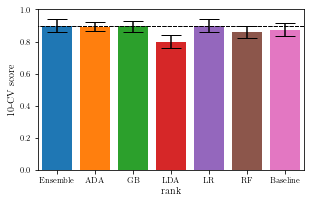

In [36]:
row, col = 1,1
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=set_size(width,fraction=1, subplots=(row,col)))
for target in targets:
    cv_mean = ranks[target]['SVM']['cv_mean'][6-1]
    cv_std = ranks[target]['SVM']['cv_std'][6-1]
    print(target, cv_mean, cv_std)
    if(target == 'ensemble'): label = target.capitalize()
    elif(target == 'boost'): label = 'GB'
    elif(target == 'baseline'): label = target.capitalize()
    else: label = target.upper()
    ax.bar(label, cv_mean, yerr=cv_std, ecolor='black', capsize=10)
    ax.plot([-1,7], [0.9,0.9], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
    ax.set_xlabel(f"rank")
    ax.set_ylabel(f"10-CV score")
    ax.set_xlim(-0.5,6.5)
    ax.set_ylim(0,1)
plt.savefig(fname=f"./figures/bar_svm_at_6.png", dpi=900)
plt.show()

ensemble 0.775 0.03
ada 0.8 0.049
boost 0.778 0.06
lda 0.767 0.057
lr 0.836 0.04
rf 0.776 0.039
baseline 0.753 0.032


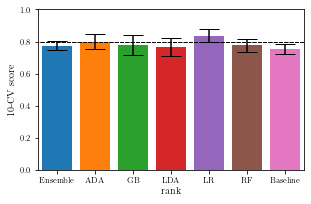

In [37]:
row, col = 1,1
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=set_size(width,fraction=1, subplots=(row,col)))
for target in targets:
    cv_mean = ranks[target]['LR']['cv_mean'][9-1]
    cv_std = ranks[target]['LR']['cv_std'][9-1]
    print(target, cv_mean, cv_std)
    if(target == 'ensemble'): label = target.capitalize()
    elif(target == 'boost'): label = 'GB'
    elif(target == 'baseline'): label = target.capitalize()
    else: label = target.upper()
    ax.bar(label, cv_mean, yerr=cv_std, ecolor='black', capsize=10)
    ax.plot([-1,7], [0.8,0.8], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
    ax.set_xlabel(f"rank")
    ax.set_ylabel(f"10-CV score")
    ax.set_xlim(-0.5,6.5)
    ax.set_ylim(0,1)
plt.savefig(fname=f"./figures/bar_lr_at_9.png", dpi=900)
plt.show()


# Latex

In [38]:
features = np.array(['Fp1_Delta','F3_Delta','F4_Delta','C3_Delta','P4_Delta','F3_Theta','C3_Theta','T4_Theta','P4_Theta','F3_Alpha','F4_Alpha','F7_Alpha','T6_Alpha','P4_Alpha','F3_Beta','F3_Gamma','T3_Gamma','F3_Slow','F3_Low_beta','T4_Low_beta','C3_relative_gamma','alpha_frontal','alpha_temporal','alpha_asymmetry','beta_frontal'])
rank_lr = [14,4,24,20,1,2,7,18,13,11,10,9,0,12,15,8,19,5,3,6,16,22,23,21,17]
rank_boost = [1,24,6,8,2,15,16,12,19,3,11,9,14,18,10,13,20,0,5,4,7,21,23,17,22]
rank_ada = [8,19,4,15,14,24,1,2,13,11,12,7,6,5,3,9,20,21,0,23,16,17,18,22,10]
rank_rf = [1,24,15,6,3,16,7,19,9,8,5,2,20,4,11,0,14,13,10,12,17,21,23,18,22]
rank_lda = [17,10,14,5,18,20,24,2,1,13,4,7,21,6,9,11,3,0,23,22,16,8,19,15,12]
rank_baseline = list(range(25))
# rank_ensemble = [24,1,2,14,4,15,8,6,20,7,19,13,11,9,5,3,10,18,16,12,0,17,21,23,22]
feature_score = [0] * 25 
for i in range(25):
    score = i
    round_feature = [ rank_lr[i], rank_boost[i], rank_ada[i], rank_rf[i], rank_lda[i] ]
    for feature in round_feature:
        feature_score[feature] += score

# print(feature_score)
feature_score = np.array(feature_score)

rank_ensemble = (feature_score).argsort()
# print(feature_score[rank_ensemble])

print("no", "index", "score", "name")
for i in range(len(rank_ensemble)):
    print(i, rank_ensemble[i], feature_score[rank_ensemble[i]], features[rank_ensemble[i]] )

no index score name
0 24 15 beta_frontal
1 1 18 F3_Delta
2 2 34 F4_Delta
3 14 34 F3_Beta
4 4 45 P4_Delta
5 15 47 F3_Gamma
6 8 48 P4_Theta
7 6 49 C3_Theta
8 20 52 C3_relative_gamma
9 7 54 T4_Theta
10 19 54 T4_Low_beta
11 13 57 P4_Alpha
12 11 57 F7_Alpha
13 9 59 F3_Alpha
14 5 61 F3_Theta
15 3 61 C3_Delta
16 10 67 F4_Alpha
17 18 69 F3_Low_beta
18 16 71 T3_Gamma
19 12 73 T6_Alpha
20 0 79 Fp1_Delta
21 17 88 F3_Slow
22 21 94 alpha_frontal
23 23 103 alpha_asymmetry
24 22 111 alpha_temporal


In [39]:
import pandas as pd

features = [
r"$\text{FP1}_{\delta}$",
r"$\text{F3}_{\delta}$",
r"$\text{F4}_{\delta}$",
r"$\text{C3}_{\delta}$",
r"$\text{P4}_{\delta}$",
r"$\text{F3}_{\theta}$",
r"$\text{C3}_{\theta}$",
r"$\text{T4}_{\theta}$",
r"$\text{P4}_{\theta}$",
r"$\text{F3}_{\alpha}$",
r"$\text{F4}_{\alpha}$",
r"$\text{F7}_{\alpha}$",
r"$\text{T6}_{\alpha}$",
r"$\text{P4}_{\alpha}$",
r"$\text{F3}_{\beta}$",
r"$\text{F3}_{\gamma}$",
r"$\text{T3}_{\gamma}$",
r"$\text{F3}_\text{slow}$",
r"$\text{F3}_{\text{Low}\beta}$",
r"$\text{T4}_{\text{Low}\beta}$",
r"$\text{C3}_{\text{RG}}$",
r"$\alpha_{f}$",
r"$\alpha_{t}$",
r"$\alpha_{a}$",
r"$\beta_{f}$"]
features = np.array(features)

In [40]:
print(ranks['baseline'].keys())

dict_keys(['SVM', 'LR', 'Boost', 'Ada', 'RF', 'LDA'])


In [49]:
cvs = dict()
for model in models:
    if(model not in cvs): cvs[model] = []
    is_reached = False
    for i in range(25):
        cv_mean = ranks['baseline'][model]['cv_mean'][i]
        cv_std = ranks['baseline'][model]['cv_std'][i]
        value = f"{cv_mean:.3f}$\pm${cv_std:.3f}"
        if(is_reached == False):
            if(model not in ['LR','LDA'] and cv_mean >= 0.9):
                value = "\\textbf{"+value+"}"
                is_reached = True
            elif(model in ['LR','LDA'] and cv_mean >= 0.8):
                value = "\\textbf{"+value+"}"
                is_reached = True
        cvs[model].append(value)

baseline = pd.DataFrame(dict({
    "No.":list(range(1,26)),
    "$\text{Rank}_{\text{baseline}}$": features,
    "SVM": cvs['SVM'],
    "LR": cvs['LR'],
    "GB": cvs["Boost"],
    "ADA": cvs["Ada"],
    "RF": cvs["RF"],
    "LDA": cvs["LDA"],

}))

print(
    baseline.to_latex(index=False, escape=False, column_format="r|ccccccc", position='centering', 
            caption='The 10-CV score of each classifier when using $\\text{Rank}_{\\text{baseline}}$ as a rank.', 
            label="tab:cv_baseline_apen")
        .replace('toprule','hline')
        .replace('midrule','hline')
        .replace('bottomrule','hline')
        .replace('[centering]','[h!]')
    )

\begin{table}[h!]
\centering
\caption{The 10-CV score of each classifier when using $\text{Rank}_{\text{baseline}}$ as a rank.}
\label{tab:cv_baseline_apen}
\begin{tabular}{r|ccccccc}
\hline
 No. & $\text{Rank}_{\text{baseline}}$ &                      SVM &                       LR &                       GB &                      ADA &                       RF &                      LDA \\
\hline
   1 &           $\text{FP1}_{\delta}$ &          0.621$\pm$0.046 &          0.578$\pm$0.054 &          0.606$\pm$0.030 &          0.604$\pm$0.036 &          0.525$\pm$0.045 &          0.585$\pm$0.044 \\
   2 &            $\text{F3}_{\delta}$ &          0.740$\pm$0.061 &          0.678$\pm$0.055 &          0.733$\pm$0.047 &          0.710$\pm$0.049 &          0.724$\pm$0.061 &          0.676$\pm$0.045 \\
   3 &            $\text{F4}_{\delta}$ &          0.769$\pm$0.043 &          0.667$\pm$0.062 &          0.765$\pm$0.047 &          0.714$\pm$0.037 &          0.761$\pm$0.028 &          0.664

/tmp/ipykernel_532/1640729904.py:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  baseline.to_latex(index=False, escape=False, column_format="r|ccccccc", position='centering',


In [50]:
coeff = [1.894,1.651,-1.435,-1.346,-1.273,-1.258,0.952,-0.841,-0.833,0.767,-0.609,-0.594,-0.503,-0.465,0.422,0.405,0.396,-0.384,0.35,-0.348,-0.323,-0.201,-0.182,-0.067,0.036]
cvs = dict()
for model in models:
    if(model not in cvs): cvs[model] = []
    is_reached = False
    for i in range(25):
        cv_mean = ranks['lr'][model]['cv_mean'][i]
        cv_std = ranks['lr'][model]['cv_std'][i]
        value = f"{cv_mean:.3f}$\pm${cv_std:.3f}"
        if(is_reached == False):
            if(model not in ['LR','LDA'] and cv_mean >= 0.9):
                value = "\\textbf{"+value+"}"
                is_reached = True
            elif(model in ['LR','LDA'] and cv_mean >= 0.8):
                value = "\\textbf{"+value+"}"
                is_reached = True
        cvs[model].append(value)

LRC = pd.DataFrame(dict({
    "No.":list(range(1,26)),
    "$\text{Rank}_{\text{LR}}$": features[rank_lr],
    "coeff": coeff,
    "SVM": cvs['SVM'],
    "LR": cvs['LR'],
    "GB": cvs["Boost"],
    "ADA": cvs["Ada"],
    "RF": cvs["RF"],
    "LDA": cvs["LDA"],

}))

print(
    LRC.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering', 
            caption='The 10-CV score of each classifier when using $\\text{Rank}_{\\text{LR}}$ as a rank.', 
            label="tab:cv_lr_apen")
        .replace('toprule','hline')
        .replace('midrule','hline')
        .replace('bottomrule','hline')
        .replace('[centering]','[h!]')
    )

\begin{table}[h!]
\centering
\caption{The 10-CV score of each classifier when using $\text{Rank}_{\text{LR}}$ as a rank.}
\label{tab:cv_lr_apen}
\begin{tabular}{r|cccccccc}
\hline
 No. &     $\text{Rank}_{\text{LR}}$ &  coeff &                      SVM &                       LR &                       GB &                      ADA &                       RF &                      LDA \\
\hline
   1 &           $\text{F3}_{\beta}$ &  1.894 &          0.575$\pm$0.051 &          0.558$\pm$0.040 &          0.561$\pm$0.072 &          0.607$\pm$0.075 &          0.564$\pm$0.057 &          0.565$\pm$0.046 \\
   2 &          $\text{P4}_{\delta}$ &  1.651 &          0.635$\pm$0.050 &          0.571$\pm$0.048 &          0.656$\pm$0.033 &          0.610$\pm$0.054 &          0.693$\pm$0.036 &          0.571$\pm$0.047 \\
   3 &                   $\beta_{f}$ & -1.435 &          0.749$\pm$0.058 &          0.624$\pm$0.051 &          0.753$\pm$0.047 &          0.742$\pm$0.039 &          0.814$\pm$0.055

/tmp/ipykernel_532/324074871.py:33: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  LRC.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering',


## LDA

In [53]:
coeff = [4.658,-3.383,3.258,-2.143,-1.71,-1.595,-1.398,-1.289,-1.227,-1.155,1.143,1.069,-1.042,-0.639,-0.458,0.395,0.364,-0.339,-0.279,0.271,0.18,0.077,0.066,-0.042,0.022]
cvs = dict()
for model in models:
    if(model not in cvs): cvs[model] = []
    is_reached = False
    for i in range(25):
        cv_mean = ranks['lda'][model]['cv_mean'][i]
        cv_std = ranks['lda'][model]['cv_std'][i]
        value = f"{cv_mean:.3f}$\pm${cv_std:.3f}"
        if(is_reached == False):
            if(model not in ['LR','LDA'] and cv_mean >= 0.9):
                value = "\\textbf{"+value+"}"
                is_reached = True
            elif(model in ['LR','LDA'] and cv_mean >= 0.8):
                value = "\\textbf{"+value+"}"
                is_reached = True
        cvs[model].append(value)

lda = pd.DataFrame(dict({
    "No.":list(range(1,26)),
    "$\text{Rank}_{\text{LDA}}$": features[rank_lda],
    "score": coeff,
    "SVM": cvs['SVM'],
    "LR": cvs['LR'],
    "GB": cvs["Boost"],
    "ADA": cvs["Ada"],
    "RF": cvs["RF"],
    "LDA": cvs["LDA"],

}))

print(
    lda.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering', 
            caption='The 10-CV score of each classifier when using $\\text{Rank}_{\\text{LDA}}$ as a rank.', 
            label="tab:cv_lda_apen")
        .replace('toprule','hline')
        .replace('midrule','hline')
        .replace('bottomrule','hline')
        .replace('[centering]','[h!]')
    )

\begin{table}[h!]
\centering
\caption{The 10-CV score of each classifier when using $\text{Rank}_{\text{lda}}$ as a rank.}
\label{tab:cv_lda_apen}
\begin{tabular}{r|cccccccc}
\hline
 No. &    $\text{Rank}_{\text{lda}}$ &  score &                      SVM &                       LR &                       GB &                      ADA &                       RF &                      LDA \\
\hline
   1 &       $\text{F3}_\text{slow}$ &  4.658 &          0.603$\pm$0.044 &          0.589$\pm$0.046 &          0.593$\pm$0.052 &          0.592$\pm$0.059 &          0.610$\pm$0.055 &          0.583$\pm$0.043 \\
   2 &          $\text{F4}_{\alpha}$ & -3.383 &          0.707$\pm$0.040 &          0.640$\pm$0.055 &          0.703$\pm$0.063 &          0.682$\pm$0.050 &          0.706$\pm$0.053 &          0.643$\pm$0.058 \\
   3 &           $\text{F3}_{\beta}$ &  3.258 &          0.726$\pm$0.038 &          0.658$\pm$0.049 &          0.758$\pm$0.051 &          0.718$\pm$0.046 &          0.783$\pm$0.0

/tmp/ipykernel_532/4088247503.py:33: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  lda.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering',


## Ada

In [54]:
coeff = [0.1,0.08,0.08,0.08,0.08,0.08,0.06,0.06,0.06,0.06,0.04,0.04,0.04,0.04,0.02,0.02,0.02,0.02,0.02,0.0,0.0,0.0,0.0,0.0,0.0]

cvs = dict()
for model in models:
    if(model not in cvs): cvs[model] = []
    is_reached = False
    for i in range(25):
        cv_mean = ranks['ada'][model]['cv_mean'][i]
        cv_std = ranks['ada'][model]['cv_std'][i]
        value = f"{cv_mean:.3f}$\pm${cv_std:.3f}"
        if(is_reached == False):
            if(model not in ['LR','LDA'] and cv_mean >= 0.9):
                value = "\\textbf{"+value+"}"
                is_reached = True
            elif(model in ['LR','LDA'] and cv_mean >= 0.8):
                value = "\\textbf{"+value+"}"
                is_reached = True
        cvs[model].append(value)

ada = pd.DataFrame(dict({
    "No.":list(range(1,26)),
    "$\text{Rank}_{\text{ADA}}$": features[rank_ada],
    "score": coeff,
    "SVM": cvs['SVM'],
    "LR": cvs['LR'],
    "GB": cvs["Boost"],
    "ADA": cvs["Ada"],
    "RF": cvs["RF"],
    "LDA": cvs["LDA"],

}))

print(
    ada.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering', 
            caption='The 10-CV score of each classifier when using $\\text{Rank}_{\\text{ADA}}$ as a rank.', 
            label="tab:cv_ada_apen")
        .replace('toprule','hline')
        .replace('midrule','hline')
        .replace('bottomrule','hline')
        .replace('[centering]','[h!]')
    )

\begin{table}[h!]
\centering
\caption{The 10-CV score of each classifier when using $\text{Rank}_{\text{ADA}}$ as a rank.}
\label{tab:cv_ada_apen}
\begin{tabular}{r|cccccccc}
\hline
 No. &    $\text{Rank}_{\text{ADA}}$ &  score &                      SVM &                       LR &                       GB &                      ADA &                       RF &                      LDA \\
\hline
   1 &          $\text{P4}_{\theta}$ &   0.10 &          0.594$\pm$0.070 &          0.538$\pm$0.026 &          0.571$\pm$0.040 &          0.604$\pm$0.044 &          0.517$\pm$0.071 &          0.539$\pm$0.032 \\
   2 & $\text{T4}_{\text{Low}\beta}$ &   0.08 &          0.703$\pm$0.041 &          0.572$\pm$0.045 &          0.656$\pm$0.065 &          0.633$\pm$0.029 &          0.636$\pm$0.054 &          0.569$\pm$0.031 \\
   3 &          $\text{P4}_{\delta}$ &   0.08 &          0.742$\pm$0.042 &          0.604$\pm$0.035 &          0.731$\pm$0.032 &          0.682$\pm$0.052 &          0.750$\pm$0.0

/tmp/ipykernel_532/3442880263.py:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ada.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering',


## GB

In [56]:
coeff = [0.14,0.099,0.082,0.076,0.073,0.071,0.069,0.061,0.05,0.04,0.036,0.034,0.026,0.021,0.016,0.015,0.014,0.014,0.013,0.012,0.011,0.01,0.007,0.006,0.002]
cvs = dict()
for model in models:
    if(model not in cvs): cvs[model] = []
    is_reached = False
    for i in range(25):
        cv_mean = ranks['boost'][model]['cv_mean'][i]
        cv_std = ranks['boost'][model]['cv_std'][i]
        value = f"{cv_mean:.3f}$\pm${cv_std:.3f}"
        if(is_reached == False):
            if(model not in ['LR','LDA'] and cv_mean >= 0.9):
                value = "\\textbf{"+value+"}"
                is_reached = True
            elif(model in ['LR','LDA'] and cv_mean >= 0.8):
                value = "\\textbf{"+value+"}"
                is_reached = True
        cvs[model].append(value)

gb = pd.DataFrame(dict({
    "No.":list(range(1,26)),
    "$\text{Rank}_{\text{GB}}$": features[rank_boost],
    "score": coeff,
    "SVM": cvs['SVM'],
    "LR": cvs['LR'],
    "GB": cvs["Boost"],
    "ADA": cvs["Ada"],
    "RF": cvs["RF"],
    "LDA": cvs["LDA"],

}))

print(
    gb.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering', 
            caption='The 10-CV score of each classifier when using $\\text{Rank}_{\\text{GB}}$ as a rank.', 
            label="tab:cv_gb_apen")
        .replace('toprule','hline')
        .replace('midrule','hline')
        .replace('bottomrule','hline')
        .replace('[centering]','[h!]')
    )

\begin{table}[h!]
\centering
\caption{The 10-CV score of each classifier when using $\text{Rank}_{\text{GB}}$ as a rank.}
\label{tab:cv_gb_apen}
\begin{tabular}{r|cccccccc}
\hline
 No. &     $\text{Rank}_{\text{GB}}$ &  score &                      SVM &                       LR &                       GB &                      ADA &                       RF &                      LDA \\
\hline
   1 &          $\text{F3}_{\delta}$ &  0.140 &          0.679$\pm$0.049 &          0.689$\pm$0.041 &          0.668$\pm$0.051 &          0.688$\pm$0.047 &          0.582$\pm$0.053 &          0.688$\pm$0.024 \\
   2 &                   $\beta_{f}$ &  0.099 &          0.767$\pm$0.024 &          0.731$\pm$0.050 &          0.761$\pm$0.040 &          0.749$\pm$0.042 &          0.732$\pm$0.049 &          0.725$\pm$0.054 \\
   3 &          $\text{C3}_{\theta}$ &  0.082 &          0.810$\pm$0.039 &          0.718$\pm$0.031 &          0.782$\pm$0.050 &          0.806$\pm$0.033 &          0.803$\pm$0.032

/tmp/ipykernel_532/203080440.py:33: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  gb.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering',


## RF

In [57]:
coeff = [0.103,0.076,0.066,0.052,0.048,0.045,0.045,0.045,0.041,0.038,0.038,0.036,0.036,0.036,0.035,0.033,0.032,0.032,0.029,0.029,0.027,0.026,0.023,0.019,0.012]

cvs = dict()
for model in models:
    if(model not in cvs): cvs[model] = []
    is_reached = False
    for i in range(25):
        cv_mean = ranks['rf'][model]['cv_mean'][i]
        cv_std = ranks['rf'][model]['cv_std'][i]
        value = f"{cv_mean:.3f}$\pm${cv_std:.3f}"
        if(is_reached == False):
            if(model not in ['LR','LDA'] and cv_mean >= 0.9):
                value = "\\textbf{"+value+"}"
                is_reached = True
            elif(model in ['LR','LDA'] and cv_mean >= 0.8):
                value = "\\textbf{"+value+"}"
                is_reached = True
        cvs[model].append(value)

rf = pd.DataFrame(dict({
    "No.":list(range(1,26)),
    "$\text{Rank}_{\text{RF}}$": features[rank_rf],
    "score": coeff,
    "SVM": cvs['SVM'],
    "LR": cvs['LR'],
    "GB": cvs["Boost"],
    "ADA": cvs["Ada"],
    "RF": cvs["RF"],
    "LDA": cvs["LDA"],

}))

print(
    rf.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering', 
            caption='The 10-CV score of each classifier when using $\\text{Rank}_{\\text{RF}}$ as a rank.', 
            label="tab:cv_rf_apen")
        .replace('toprule','hline')
        .replace('midrule','hline')
        .replace('bottomrule','hline')
        .replace('[centering]','[h!]')
    )

\begin{table}[h!]
\centering
\caption{The 10-CV score of each classifier when using $\text{Rank}_{\text{RF}}$ as a rank.}
\label{tab:cv_rf_apen}
\begin{tabular}{r|cccccccc}
\hline
 No. &     $\text{Rank}_{\text{RF}}$ &  score &                      SVM &                       LR &                       GB &                      ADA &                       RF &                      LDA \\
\hline
   1 &          $\text{F3}_{\delta}$ &  0.103 &          0.686$\pm$0.068 &          0.693$\pm$0.033 &          0.669$\pm$0.048 &          0.694$\pm$0.026 &          0.568$\pm$0.070 &          0.690$\pm$0.039 \\
   2 &                   $\beta_{f}$ &  0.076 &          0.767$\pm$0.046 &          0.732$\pm$0.039 &          0.751$\pm$0.037 &          0.747$\pm$0.056 &          0.733$\pm$0.037 &          0.725$\pm$0.044 \\
   3 &          $\text{F3}_{\gamma}$ &  0.066 &          0.804$\pm$0.033 &          0.729$\pm$0.057 &          0.868$\pm$0.037 &          0.821$\pm$0.039 &          0.883$\pm$0.024

/tmp/ipykernel_532/4215334813.py:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  rf.to_latex(index=False, escape=False, column_format="r|cccccccc", position='centering',


## Ensemble

In [59]:
coeff = feature_score[rank_ensemble]
cvs = dict()
for model in models:
    if(model not in cvs): cvs[model] = []
    is_reached = False
    for i in range(25):
        cv_mean = ranks['ensemble'][model]['cv_mean'][i]
        cv_std = ranks['ensemble'][model]['cv_std'][i]
        value = f"{cv_mean:.3f}$\pm${cv_std:.3f}"
        if(is_reached == False):
            if(model not in ['LR','LDA'] and cv_mean >= 0.9):
                value = "\\textbf{"+value+"}"
                is_reached = True
            elif(model in ['LR','LDA'] and cv_mean >= 0.8):
                value = "\\textbf{"+value+"}"
                is_reached = True
        cvs[model].append(value)

ensemble = pd.DataFrame(dict({
    "No.":list(range(1,26)),
    "$\text{Rank}_{\text{Ensemble}}$": features[rank_ensemble],
    "score": coeff,
    "SVM": cvs['SVM'],
    "LR": cvs['LR'],
    # "GB": cvs["Boost"],
    # "ADA": cvs["Ada"],
    # "RF": cvs["RF"],
    # "LDA": cvs["LDA"],

}))

print(
    ensemble.to_latex(index=False, escape=False, column_format="r|cccc", position='centering', 
            caption='The 10-CV score of each classifier when using $\\text{Rank}_{\\text{Ensemble}}$ as a rank.', 
            label="tab:cv_ensemble_apen")
        .replace('toprule','hline')
        .replace('midrule','hline')
        .replace('bottomrule','hline')
        .replace('[centering]','[h!]')
    )

\begin{table}[h!]
\centering
\caption{The 10-CV score of each classifier when using $\text{Rank}_{\text{Ensemble}}$ as a rank.}
\label{tab:cv_ensemble_apen}
\begin{tabular}{r|cccc}
\hline
 No. & $\text{Rank}_{\text{Ensemble}}$ &  score &                      SVM &                       LR \\
\hline
   1 &                     $\beta_{f}$ &     15 &          0.693$\pm$0.057 &          0.669$\pm$0.046 \\
   2 &            $\text{F3}_{\delta}$ &     18 &          0.765$\pm$0.029 &          0.731$\pm$0.048 \\
   3 &            $\text{F4}_{\delta}$ &     34 &          0.775$\pm$0.057 &          0.725$\pm$0.035 \\
   4 &             $\text{F3}_{\beta}$ &     34 &          0.849$\pm$0.040 &          0.743$\pm$0.047 \\
   5 &            $\text{P4}_{\delta}$ &     45 &          0.867$\pm$0.044 &          0.728$\pm$0.070 \\
   6 &            $\text{F3}_{\gamma}$ &     47 &          0.899$\pm$0.040 &          0.735$\pm$0.033 \\
   7 &            $\text{P4}_{\theta}$ &     48 &          0.890$\pm$0

/tmp/ipykernel_532/3967879258.py:33: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ensemble.to_latex(index=False, escape=False, column_format="r|cccc", position='centering',
